# 1. Problem Statement.

With environmental issues and health becoming trending topics, usage of bicycles as a mode of
transportation has gained traction in recent years. To encourage bike usage, cities across the world have
successfully rolled out bike sharing programs. Under such schemes, riders can rent bicycles using manual/
automated kiosks spread across the city for defined periods. In most cases, riders can pick up bikes from one
location and return them to any other designated place.
The bike sharing platforms from across the world are hotspots of all sorts of data, ranging from travel
time, start and end location, demographics of riders, and so on. This data along with alternate sources
of information such as weather, traffic, terrain, and so on makes it an attractive proposition for different
research areas.
The Capital Bike Sharing dataset contains information related to one such bike sharing program
underway in Washington DC. Given this augmented (bike sharing details along with weather information)
dataset, can we forecast bike rental demand for this program?

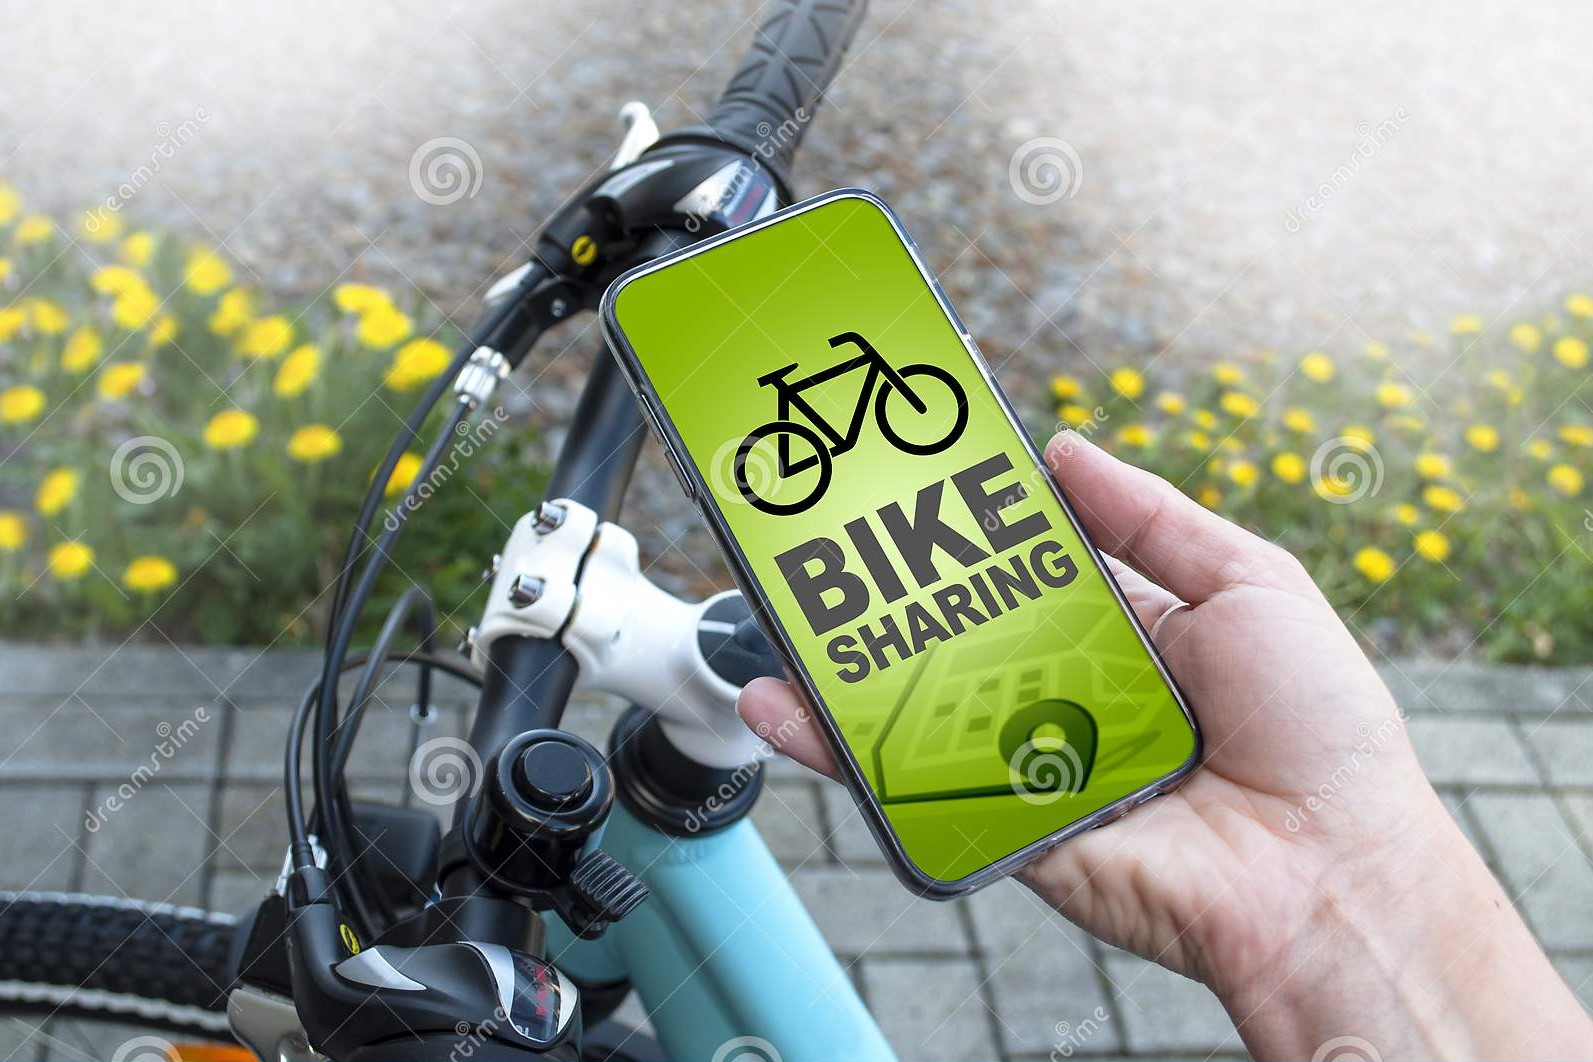

In [1]:
from IPython.display import Image
Image("Bike_Sharing.jpg",width=700,height=500)

In [2]:
# Import the required libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib
%matplotlib inline
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")
sns.set_context('talk')

pd.options.display.max_colwidth = 600

matplotlib.rcParams['axes.labelsize']='x-large'
matplotlib.rcParams['axes.titlesize']='x-large'
matplotlib.rcParams['xtick.labelsize']='x-large'
matplotlib.rcParams['ytick.labelsize']='x-large'
matplotlib.rcParams['figure.figsize']=(30,10)
matplotlib.rcParams['text.color']='k'

In [3]:
# Loading the dataset

hour_df = pd.read_csv('hour.csv')
print("Shape of dataset::{}".format(hour_df.shape))

Shape of dataset::(17379, 17)


The dataset contains more than 17k records with 17 attributes. 

In [4]:
#Let’s check the top few rows to see how the data looks. We use the head() utility from pandas 

print(" sample rows for Bike sharing data")

#print('\n')

hour_df.head()

 sample rows for Bike sharing data


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# The following function wil show the random samle of the data.

hour_df.sample(10) 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16908,16909,2012-12-12,4,1,12,7,0,3,1,2,0.26,0.2576,0.60,0.1940,3,366,369
1447,1448,2011-03-05,1,0,3,14,0,6,0,2,0.48,0.4697,0.59,0.2836,80,118,198
1304,1305,2011-02-27,1,0,2,13,0,0,0,1,0.42,0.4242,0.47,0.0000,90,169,259
7122,7123,2011-10-29,4,0,10,9,0,6,0,3,0.28,0.2576,0.87,0.3582,1,19,20
1311,1312,2011-02-27,1,0,2,20,0,0,0,1,0.40,0.4091,0.54,0.0896,9,72,81
5940,5941,2011-09-10,3,0,9,1,0,6,0,2,0.62,0.5455,0.94,0.0000,16,67,83
195,196,2011-01-09,1,0,1,10,0,0,0,1,0.14,0.1061,0.43,0.3881,0,49,49
13113,13114,2012-07-05,3,1,7,14,0,4,1,1,0.92,0.8333,0.33,0.3284,87,154,241
6935,6936,2011-10-21,4,0,10,14,0,5,1,1,0.52,0.5000,0.42,0.2985,67,131,198
15896,15897,2012-10-31,4,1,10,1,0,3,1,2,0.30,0.3182,0.81,0.0896,0,8,8


# Exploratory Data Analysis.

After loading and inspecting sample of data,the very next stage is to explore and understand the data. This is also called 
the Exploratory Data Analysis (EDA) step. In this section,we will load the data into our analysis environment and explore
its properties.The EDA is one of the most important phases in the whole workflow and can help with not just understanding 
the dataset, but also in presenting certain fine points that can be useful in the coming steps.

## Data Preprocessing.

In the data preprocessing task we perform the data cleaning,missing value check,check duplicated data,filling missing values 
if necessary typecasting of data,check outlier and other required task to clean and prepare data for analysis and modelling.

In [6]:
#. Next, we need to check what data types pandas has inferred and if any of the attributes require type conversions.

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


As mentioned in the documentation for the dataset, there are bike sharing as well as weather attributes available. The

attribute dteday would require type conversion from object (or string type) to timestamp. Attributes like season, holiday,

weekday, and so on are inferred as integers by pandas, and they would require conversion to categoricals for proper 

understanding.


In [7]:
# Before jumping into type casting attributes, we need to rename the attribute names to make them more understandable.

hour_df.rename(columns={'instant':'rec_id','dteday':'datetime','holiday':'is_holiday','workingday':'is_workingday',
                        'weathersit':'weather_condition','hum':'humidity','mnth':'month','cnt':'total_count','hr':'hour',
                        'yr':'year'},inplace=True) 

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rec_id             17379 non-null  int64  
 1   datetime           17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   is_holiday         17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   is_workingday      17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  total_count        173

In [9]:
# dataset summary stats
hour_df.describe()

,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Typecast Attributes

In [10]:
# Now we will do typecasting task to bring datatyps to correct form.

# Dateime conversion
hour_df['datetime'] = pd.to_datetime(hour_df['datetime'])

#categorical variables

hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')


In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  category      
 6   is_holiday         17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   is_workingday      17379 non-null  category      
 9   weather_condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

## Visualize Attributes, Trends and Relationships

The dataset after preprocessing (which we performed in the previous step) is ready for some visual inspection. 

### 1. visualizing hourly ridership counts across the seasons.

+ Seasons are encoded as 1:spring, 2:summer, 3:fall, 4:winter

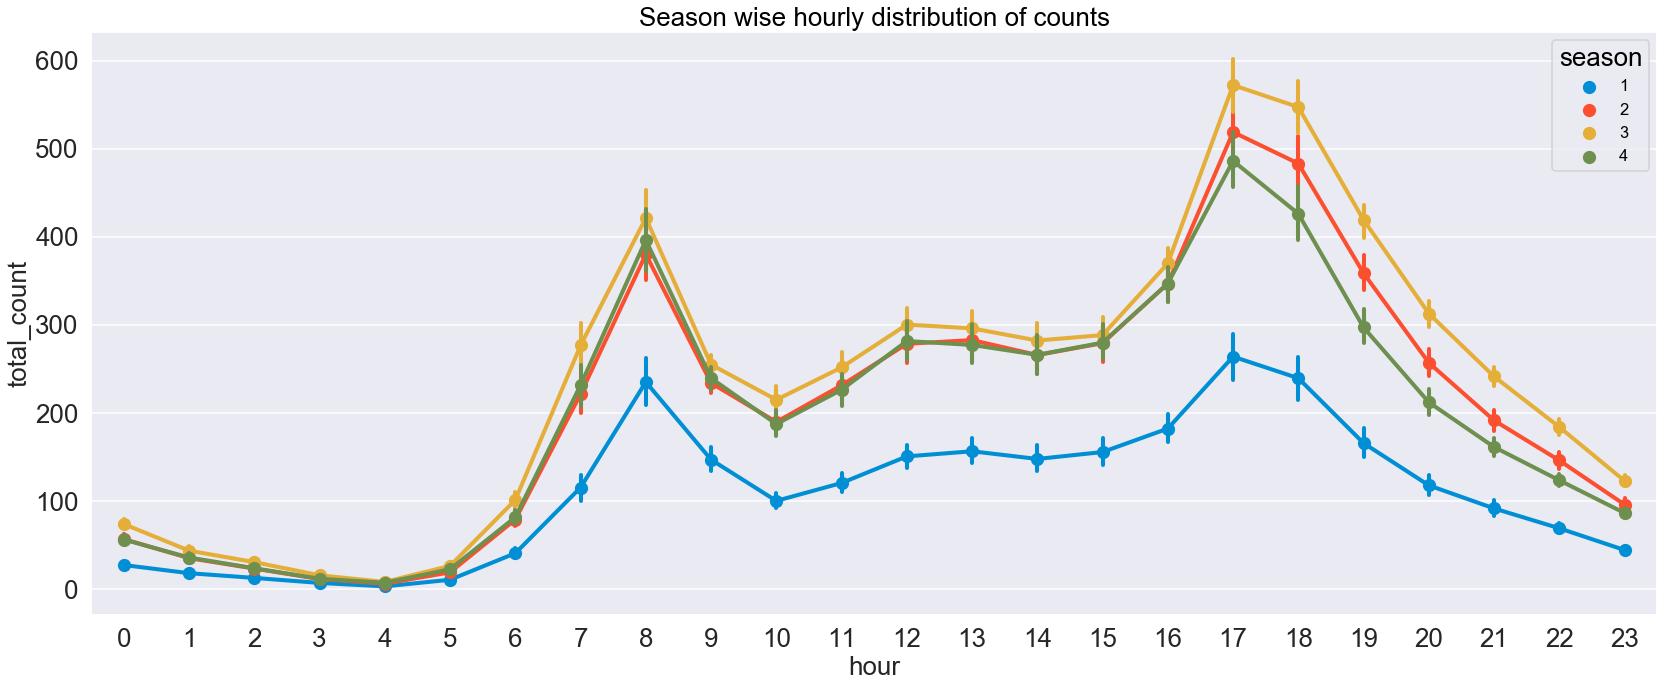

In [12]:
import seaborn as sns # the package is used to plot colorful visualization.


fig,ax = plt.subplots(figsize=(25,10))
sns.pointplot(data=hour_df[['hour','total_count','season']],x='hour',y='total_count',hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts")
plt.show()

The plot in the above Figure shows similar trends for all seasons with counts peaking in the morning between
7-9 am and in the evening between 4-6 pm, possibly due to high movement during start and end of office
hours. The counts are lowest for the spring season, while fall sees highest riders across all 24 hours.

Overall higher usage in the second half of the day.

### 2. Visualizing Weekday wise hourly distribution of counts

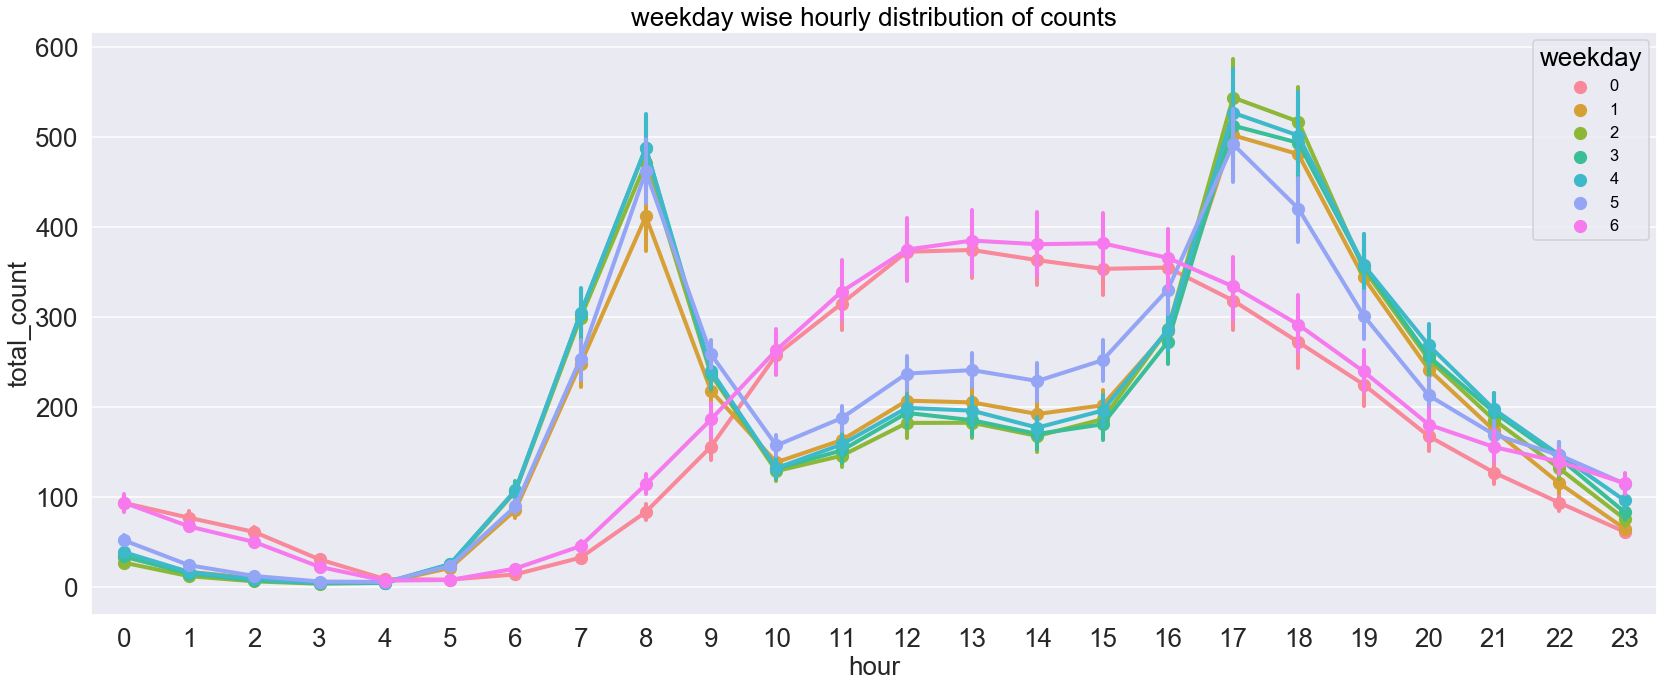

In [13]:
fig,ax = plt.subplots(figsize=(25,10))
sns.pointplot(data=hour_df[['hour','total_count','weekday']],x='hour',y='total_count',hue='weekday',ax=ax)
ax.set(title="weekday wise hourly distribution of counts")
plt.show()

Distribution of ridership across days of the week also presents interesting trends of higher usage during afternoon hours 
over weekends, while weekdays see higher usage during mornings and evenings.


1. Weekends (0 and 6) and Weekdays (1-5) show different usage trends with weekend's peak usage in during afternoon hours
2. Weekdays follow the overall trend, similar to one visualized in the previous plot
3. Weekdays have higher usage as compared to weekends
4. It would be interesting to see the trends for casual and registered users separately

[Text(0.5, 1.0, 'Box Pot for hourly distribution of counts')]

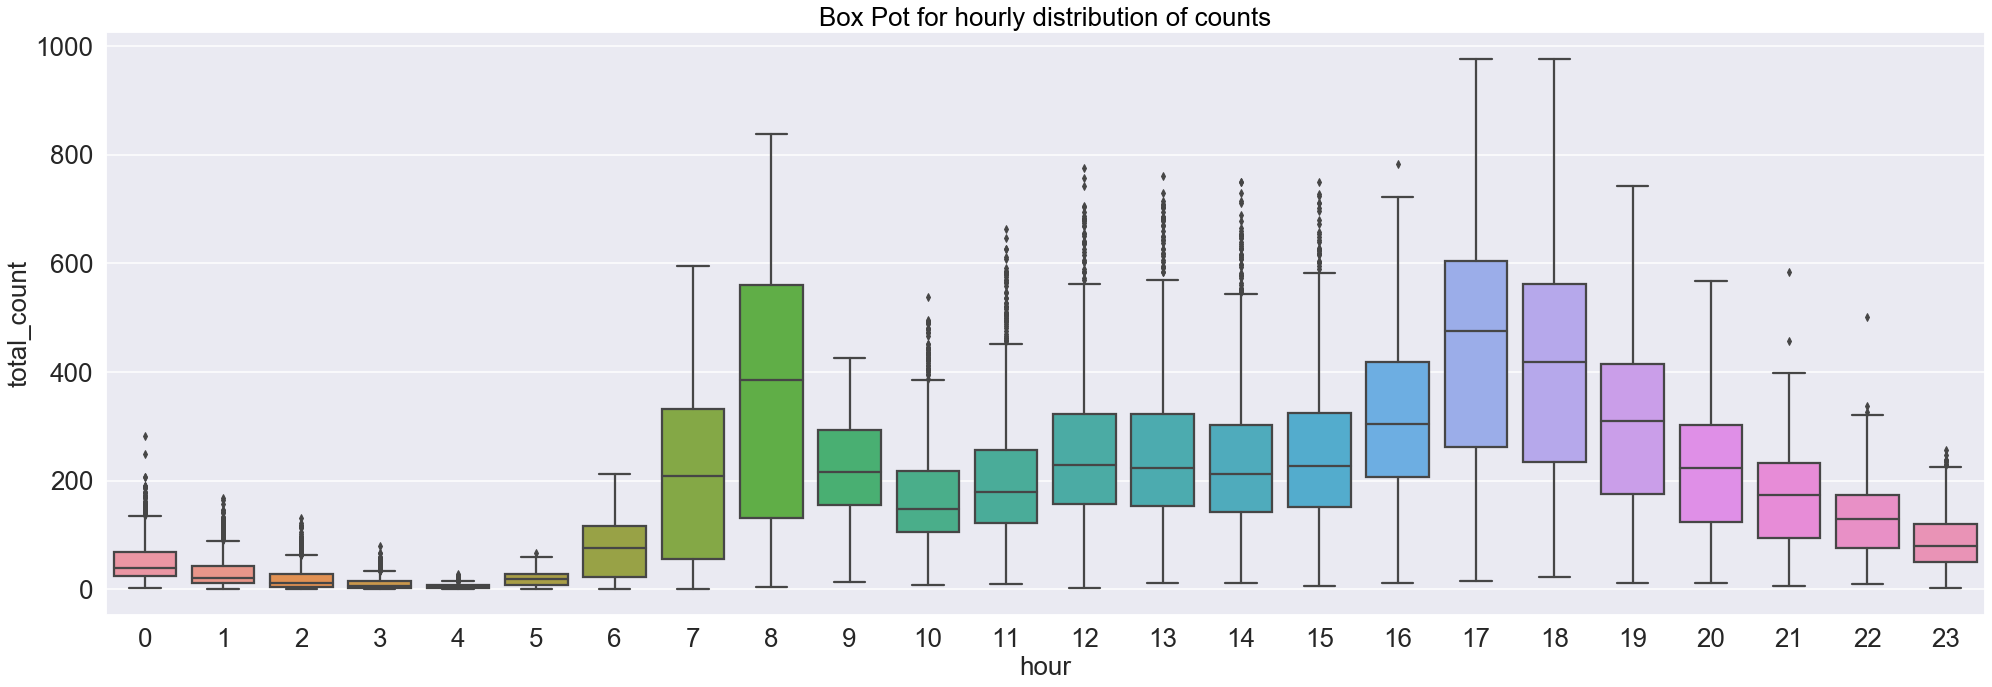

In [14]:
fig,ax = plt.subplots()
sns.boxplot(data=hour_df[['hour','total_count']],x="hour",y="total_count",ax=ax)
ax.set(title="Box Pot for hourly distribution of counts")

1. Early hours (0-4) and late nights (21-23) have low counts but significant outliers.
2. Afternoon hours also have outliers.
3. Peak hours have higher medians and overall counts with virtually no outliers.

## 3. Monthly distribution of Total Counts

[Text(0.5, 1.0, 'Monthly distribution of counts')]

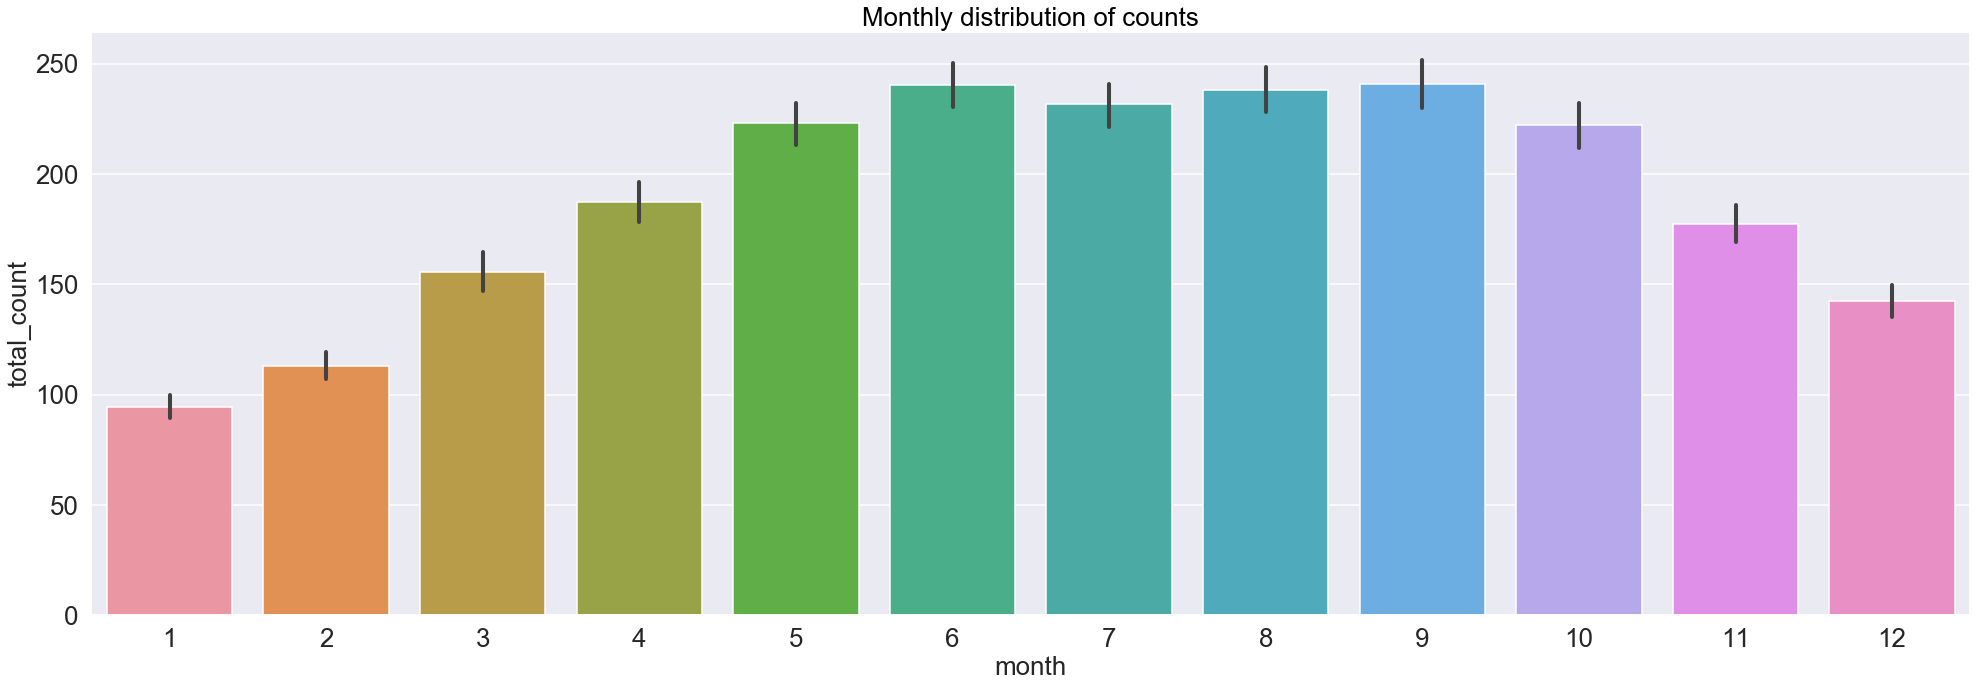

In [15]:
fig,ax = plt.subplots()
sns.barplot(data=hour_df[['month',
                         'total_count']],
           x="month",y="total_count")
ax.set(title="Monthly distribution of counts")

1. The generated barplot showcases a definite trend in ridership based on month of the year.
2. The months June-September see highest ridership. Looks like Fall is a good season for Bike Sharing programs in
   Washington, D.C.

[Text(0.5, 1.0, 'Winter')]

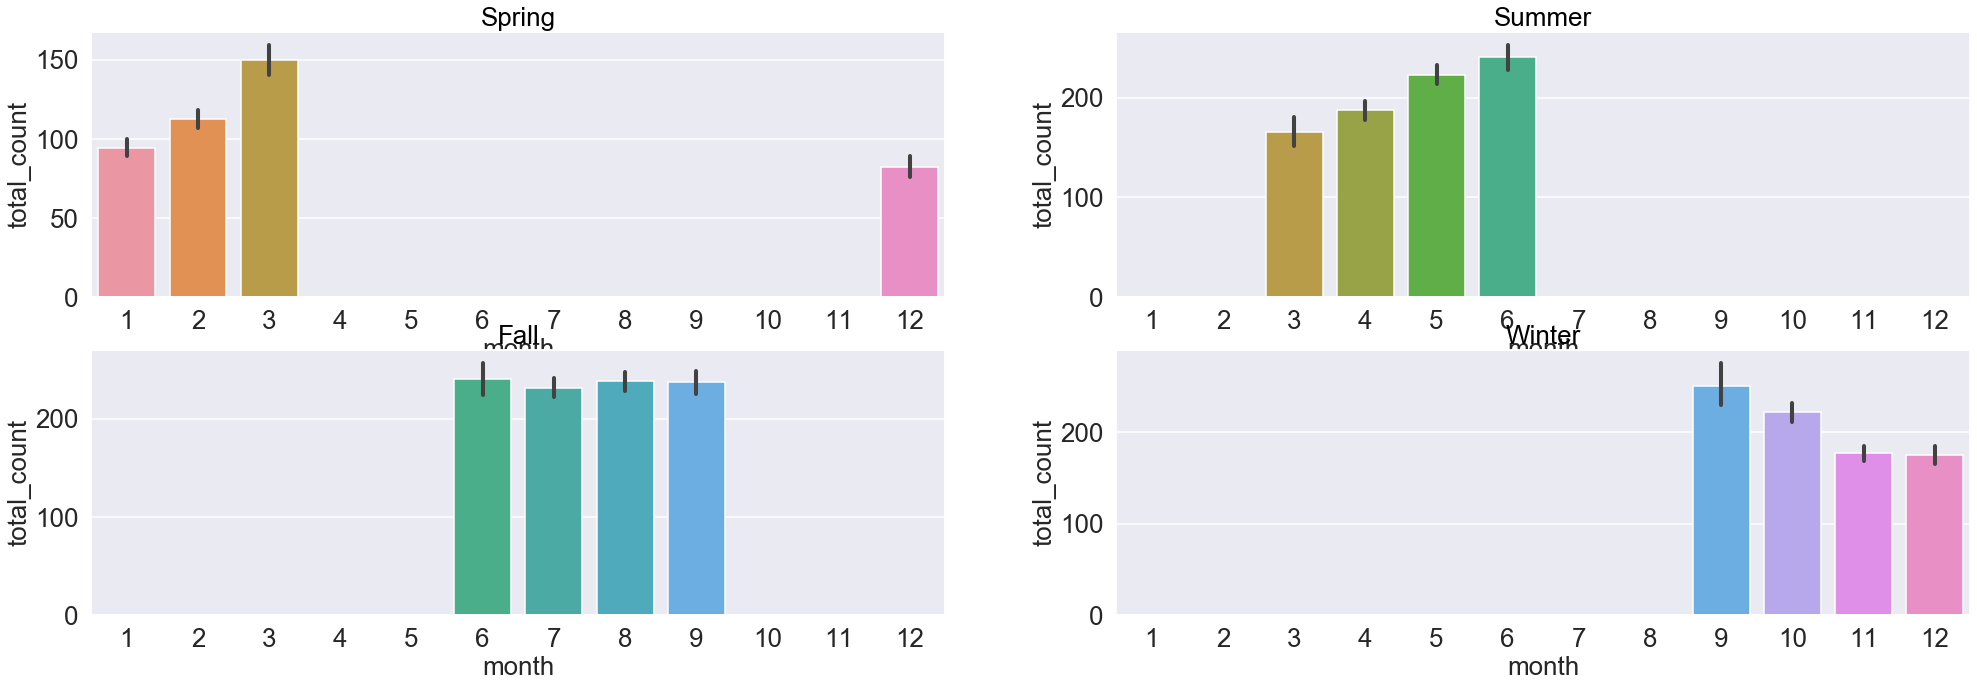

In [16]:
df_col_list = ['month','weekday','total_count']
plot_col_list= ['month','total_count']
spring_df = hour_df[hour_df.season==1][df_col_list]
summer_df = hour_df[hour_df.season==2][df_col_list]
fall_df = hour_df[hour_df.season==3][df_col_list]
winter_df = hour_df[hour_df.season==4][df_col_list]

fig,ax= plt.subplots(nrows=2,ncols=2)
sns.barplot(data=spring_df[plot_col_list],x="month",y="total_count",ax=ax[0][0],)
ax[0][0].set(title="Spring")

sns.barplot(data=summer_df[plot_col_list],x="month",y="total_count",ax=ax[0][1])
ax[0][1].set(title="Summer")

sns.barplot(data=fall_df[plot_col_list],x="month",y="total_count",ax=ax[1][0])
ax[1][0].set(title="Fall")

sns.barplot(data=winter_df[plot_col_list],x="month",y="total_count",ax=ax[1][1])  
ax[1][1].set(title="Winter")

## 4. Year Wise Count Distributions

[Text(0.5, 1.0, 'yearly distribution of counts')]

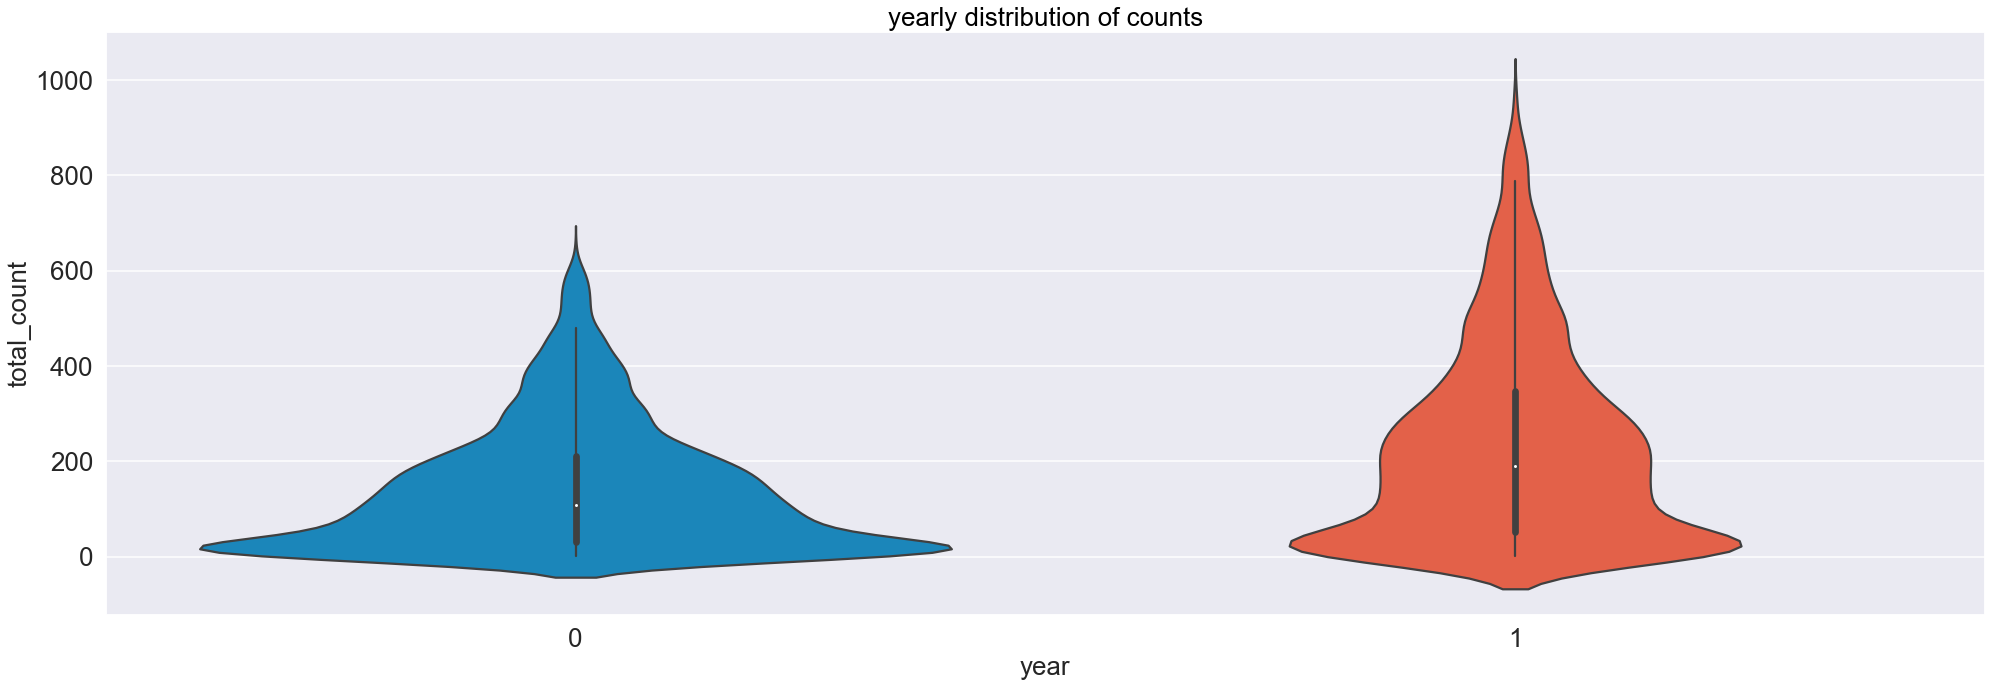

In [17]:
fig,ax = plt.subplots()
sns.violinplot(data=hour_df[['year',
                         'total_count']],
           x="year",y="total_count")
ax.set(title="yearly distribution of counts")


1. Both years have multimodal distributions
2. 2011 has lower counts overall with a lower median
3. 2012 has a higher max count though the peaks are around 100 and 300 which is then tapering off.

## 5. Working Day Vs Holiday Distribution.

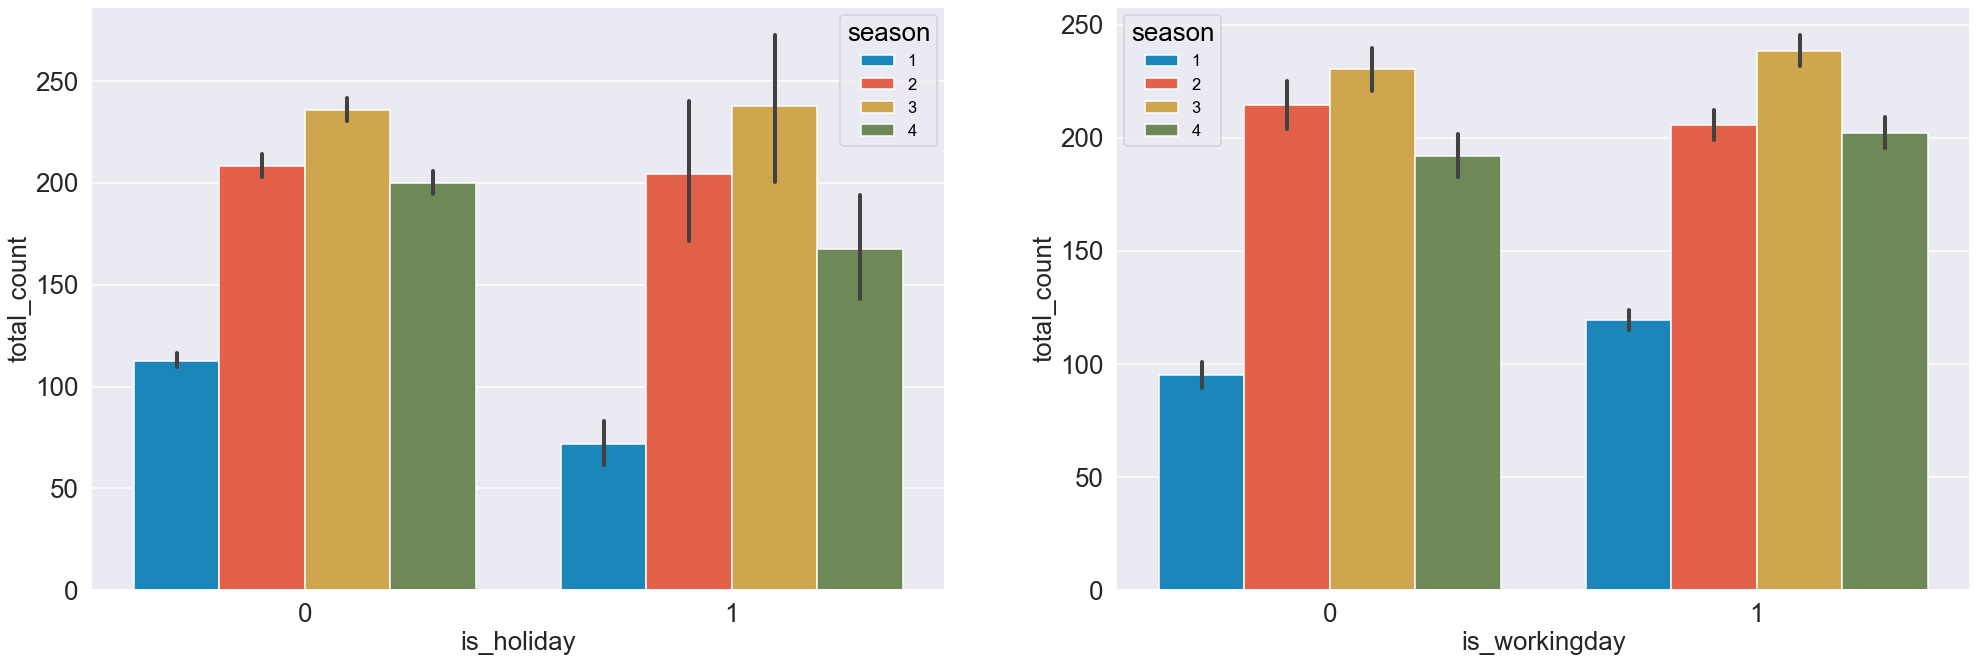

In [18]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.barplot(data=hour_df,x='is_holiday',y='total_count',hue='season',ax=ax1)
sns.barplot(data=hour_df,x='is_workingday',y='total_count',hue='season',ax=ax2)

## 6. Outliers.

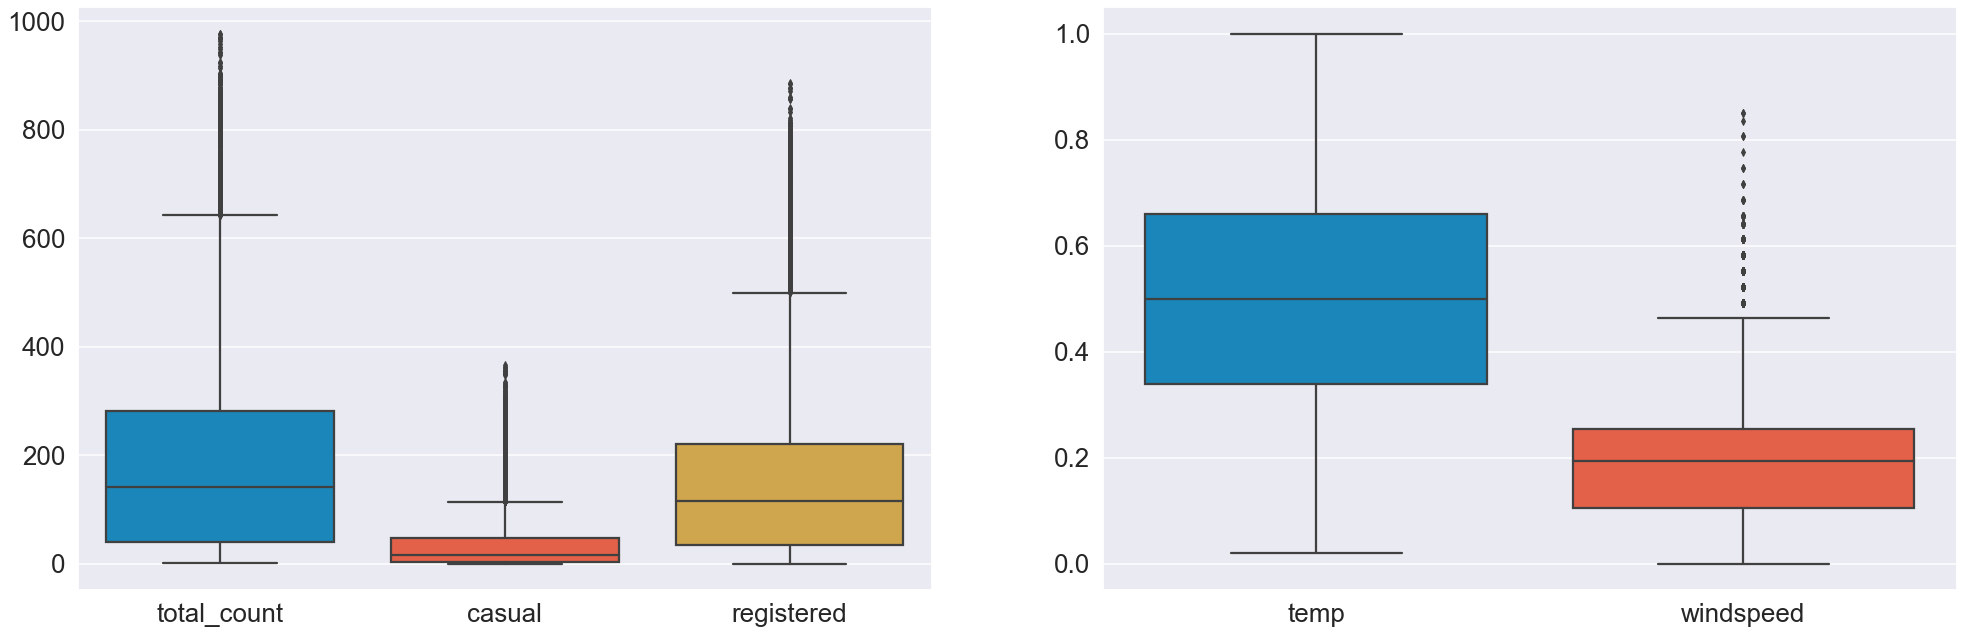

In [19]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
sns.boxplot(data=hour_df[['total_count',
                         'casual','registered']],ax=ax1)
sns.boxplot(data=hour_df[['temp','windspeed']],ax=ax2)

## 7. Correlations.

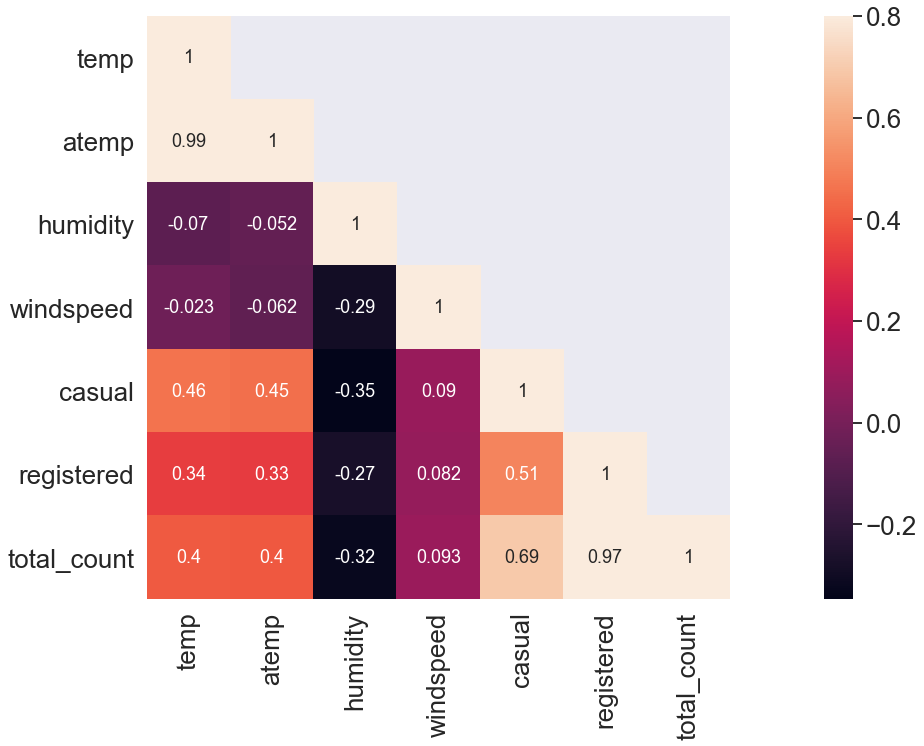

In [20]:
corrMatt = hour_df[["temp","atemp",
                    "humidity","windspeed",
                    "casual","registered",
                    "total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

## Bike Sharing Dataset Linear Modeling

In [21]:
# modeling utilities
import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

### Encode Categoricals (One Hot Encoding)

In [22]:
def fit_transform_ohe(df,col_name):
    """This function performs one hot encoding for the specified
        column.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded

    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series

    """
    # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return le,ohe,features_df


# given label encoder and one hot encoder objects, 
# encode attribute to ohe
def transform_ohe(df,le,ohe,col_name):
    """This function performs one hot encoding for the specified
        column using the specified encoder objects.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        le(Label Encoder): the label encoder object used to fit label encoding
        ohe(One Hot Encoder): the onen hot encoder object used to fit one hot encoding
        col_name: the column to be one hot encoded

    Returns:
        tuple: transformed column as pandas Series

    """
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

### Train-Test Split

In [23]:
X, X_test, y, y_test = train_test_split(hour_df.iloc[:,0:-3], hour_df.iloc[:,-1], 
                                                    test_size=0.33, random_state=42)

X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

print("Training set::{}{}".format(X.shape,y.shape))
print("Testing set::{}".format(X_test.shape))

Training set::(11643, 15)(11643, 2)
Testing set::(5736, 15)


### Normality Test

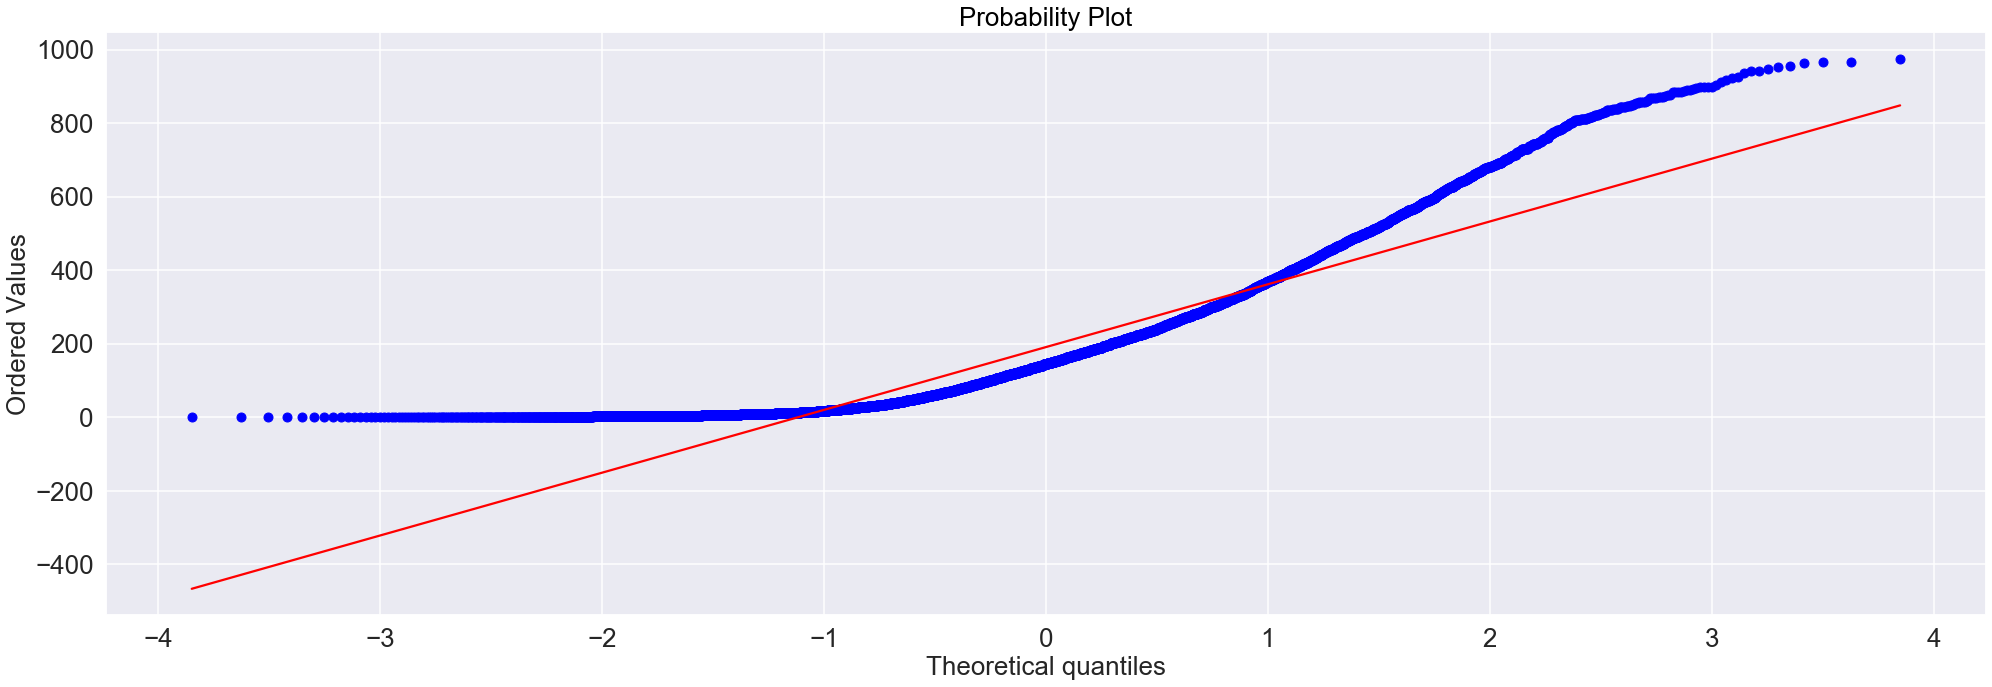

In [24]:
stats.probplot(y.total_count.tolist(), dist="norm", plot=plt)
plt.show()

In [25]:
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
numeric_feature_cols = ['temp','humidity','windspeed','hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']

In [26]:
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})

In [27]:
encoded_attr_list

[{'label_enc': LabelEncoder(),
  'ohe_enc': OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
                handle_unknown='error', sparse=True),
  'feature_df':        season_1  season_2  season_3  season_4
  0           0.0       0.0       1.0       0.0
  1           0.0       1.0       0.0       0.0
  2           0.0       0.0       1.0       0.0
  3           1.0       0.0       0.0       0.0
  4           0.0       1.0       0.0       0.0
  ...         ...       ...       ...       ...
  11638       0.0       1.0       0.0       0.0
  11639       0.0       1.0       0.0       0.0
  11640       0.0       0.0       1.0       0.0
  11641       1.0       0.0       0.0       0.0
  11642       0.0       0.0       0.0       1.0
  
  [11643 rows x 4 columns],
  'col_name': 'season'},
 {'label_enc': LabelEncoder(),
  'ohe_enc': OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
                handle_unknown='error', sparse=True),
  'featu

In [28]:
feature_df_list = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Shape::{}".format(train_df_new.shape))

Shape::(11643, 19)


## Linear Regression

In [29]:
X = train_df_new
y= y.total_count.values.reshape(-1,1)

lin_reg = linear_model.LinearRegression()

## Cross Validation

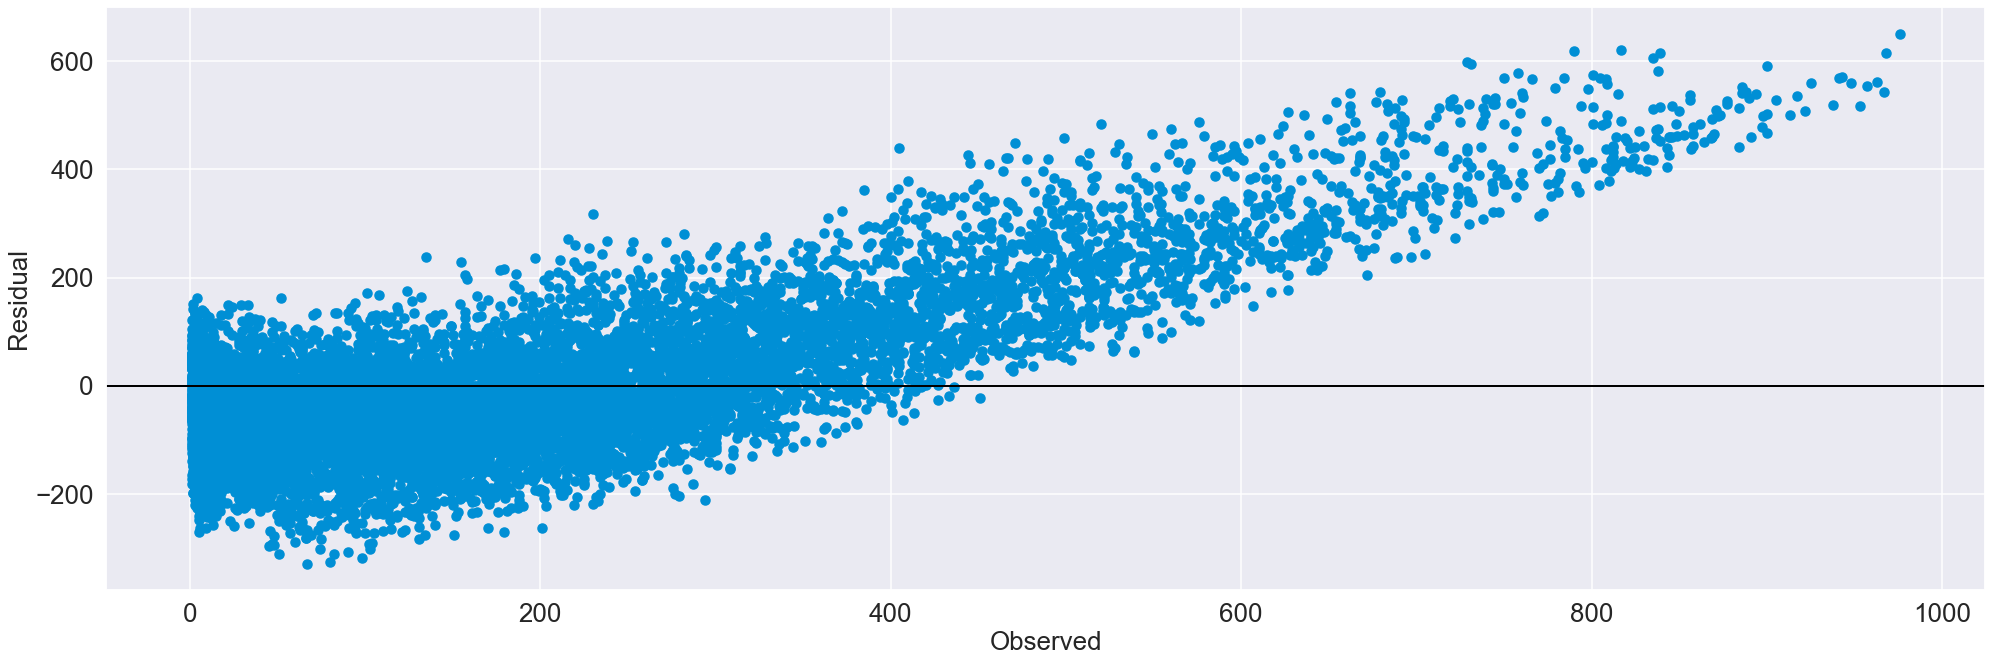

In [30]:
predicted = cross_val_predict(lin_reg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, y-predicted)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [31]:
r2_scores = cross_val_score(lin_reg, X, y, cv=10)
mse_scores = cross_val_score(lin_reg, X, y, cv=10,scoring='neg_mean_squared_error')

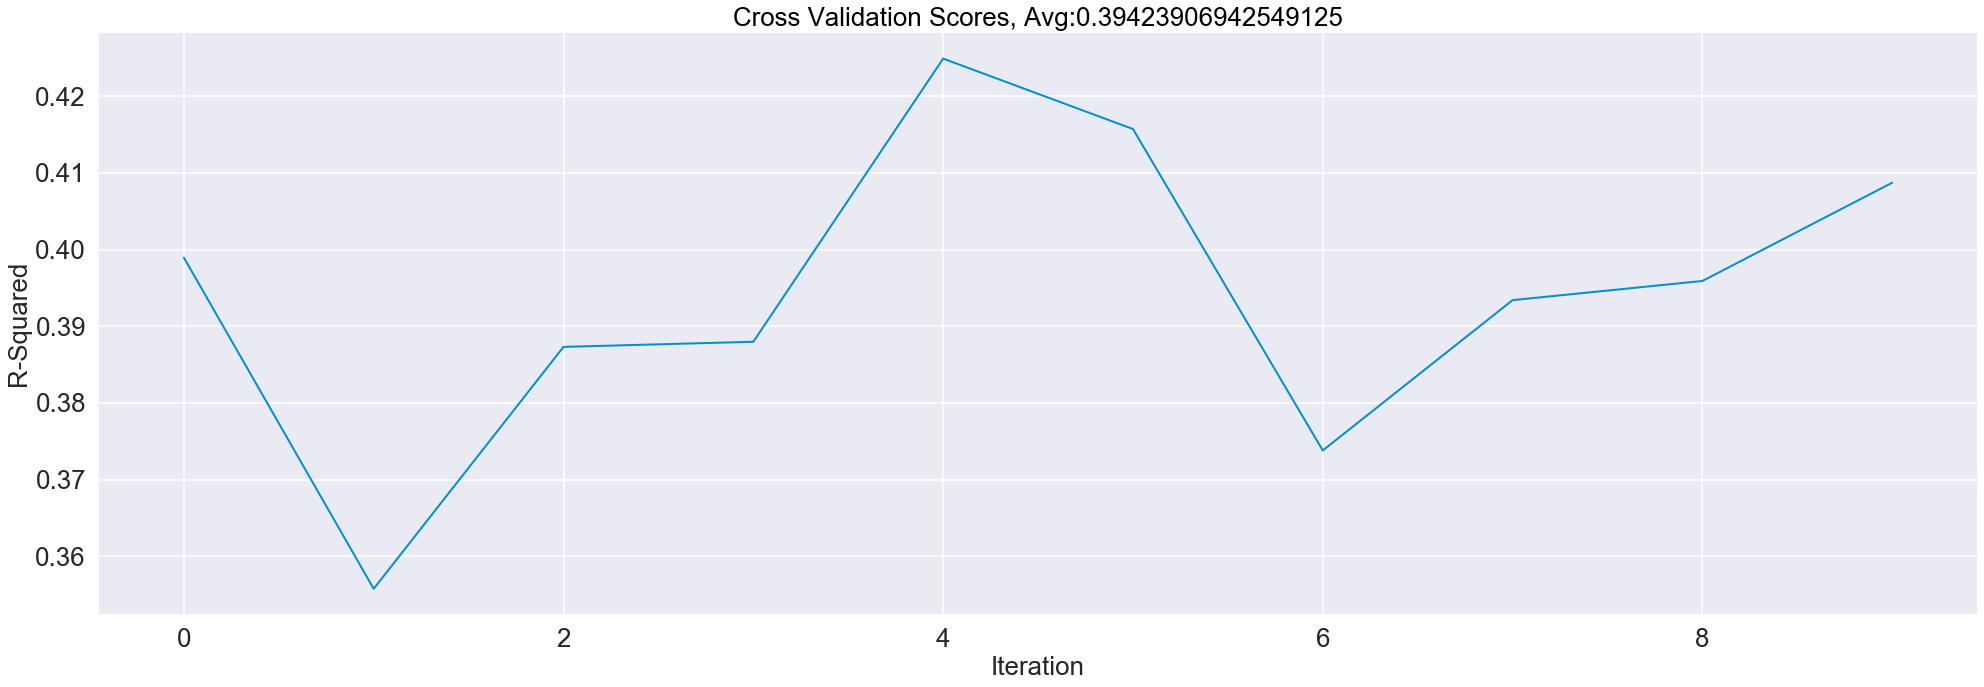

In [32]:
fig, ax = plt.subplots()
ax.plot([i for i in range(len(r2_scores))],r2_scores,lw=2)
ax.set_xlabel('Iteration')
ax.set_ylabel('R-Squared')
ax.title.set_text("Cross Validation Scores, Avg:{}".format(np.average(r2_scores)))
plt.show()

In [33]:
print("R-squared::{}".format(r2_scores))
print("MSE::{}".format(mse_scores))

R-squared::[0.39894459 0.35575732 0.3873037  0.38796861 0.42489499 0.41571164
 0.37379762 0.39339864 0.39589746 0.40871611]
MSE::[-19612.38349313 -20800.77110185 -20256.54013607 -18545.99033804
 -18746.57816436 -21015.35560028 -21549.12876053 -21567.27946203
 -21044.42416385 -18899.05989574]


In [34]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Test Dataset Performance

In [35]:
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test,
                                                              le,ohe,
                                                              col_name),
                                   'col_name':col_name})
    
    
test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] \
                             for enc in test_encoded_attr_list \
                             if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1) 
print("Shape::{}".format(test_df_new.shape))

Shape::(5736, 19)


In [36]:
test_df_new.head()

,temp,humidity,windspeed,hour,weekday,month,year,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,is_workingday_0,is_workingday_1
0,0.80,0.27,0.1940,19,6,6,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.24,0.41,0.2239,20,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.32,0.66,0.2836,2,5,10,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.78,0.52,0.3582,19,2,5,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.26,0.56,0.3881,0,4,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [37]:
X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1,1)

y_pred = lin_reg.predict(X_test)

residuals = y_test-y_pred

In [38]:
residuals 

array([[ -15.22912555],
       [-105.65636062],
       [ -60.13154566],
       ...,
       [  45.32747943],
       [ 195.90242841],
       [-126.30229605]])

In [39]:
r2_score = lin_reg.score(X_test,y_test)
print("R-squared::{}".format(r2_score))
print("MSE: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))

R-squared::0.4024409682673428
MSE: 19063.00


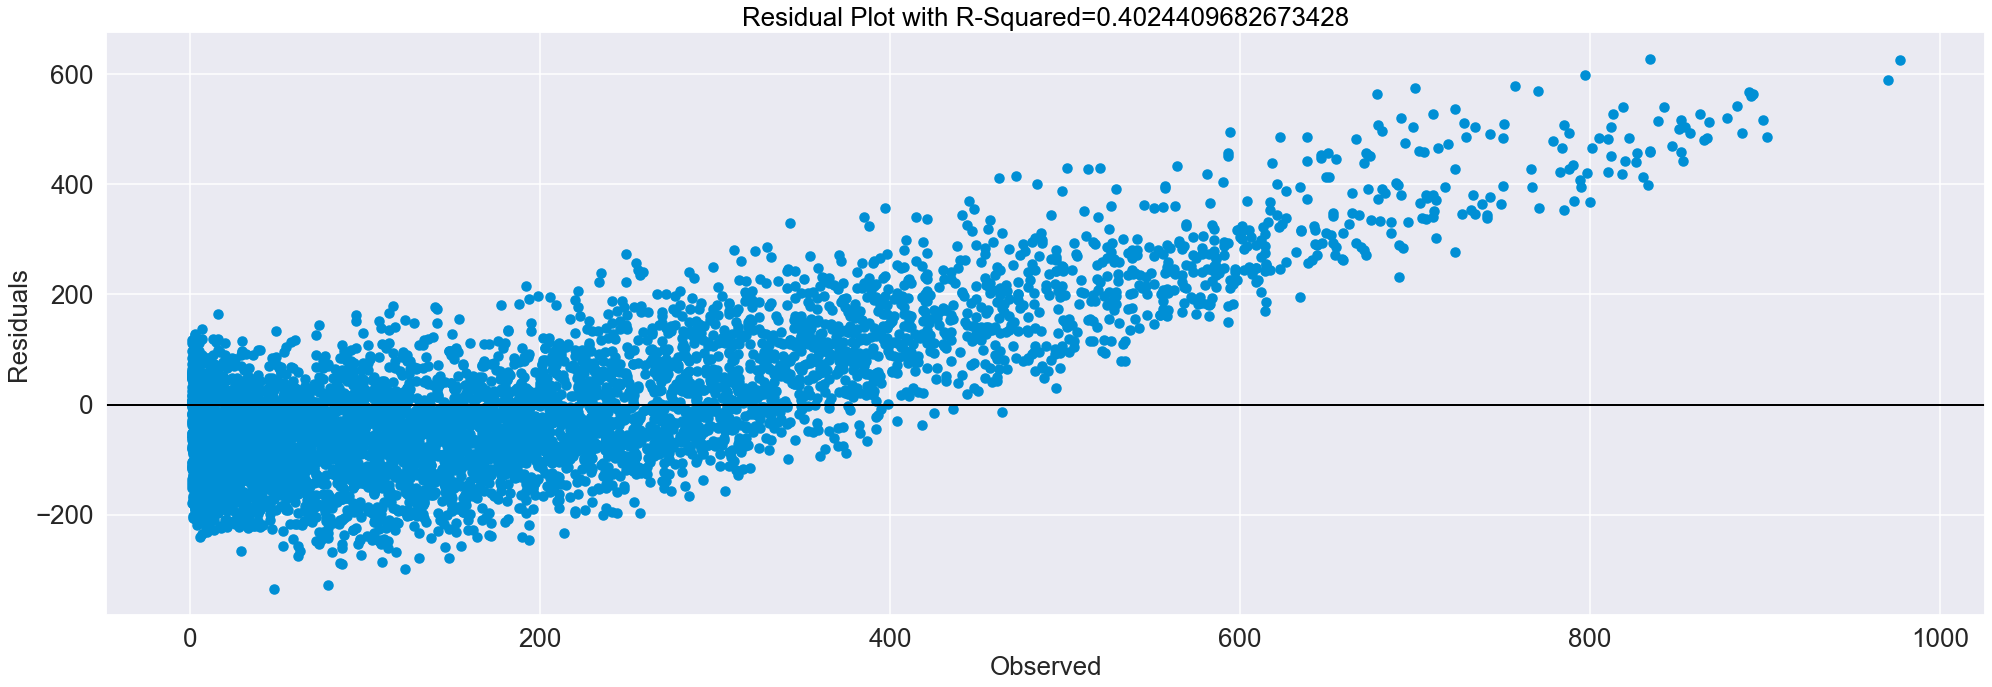

In [40]:
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot with R-Squared={}".format(np.average(r2_score)))
plt.show()

## Stats Models

In [41]:
import statsmodels.api as sm

# Set the independent variable
X = X.values.tolist()

# This handles the intercept. 
# Statsmodel takes 0 intercept by default
X = sm.add_constant(X)

X_test = X_test.values.tolist()
X_test = sm.add_constant(X_test)


# Build OLS model
model = sm.OLS(y, X)
results = model.fit()

# Get the predicted values for dependent variable
pred_y = results.predict(X_test)

# View Model stats
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     508.2
Date:                Wed, 28 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:24:43   Log-Likelihood:                -74221.
No. Observations:               11643   AIC:                         1.485e+05
Df Residuals:                   11627   BIC:                         1.486e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3509     11.086     -0.122      0.9

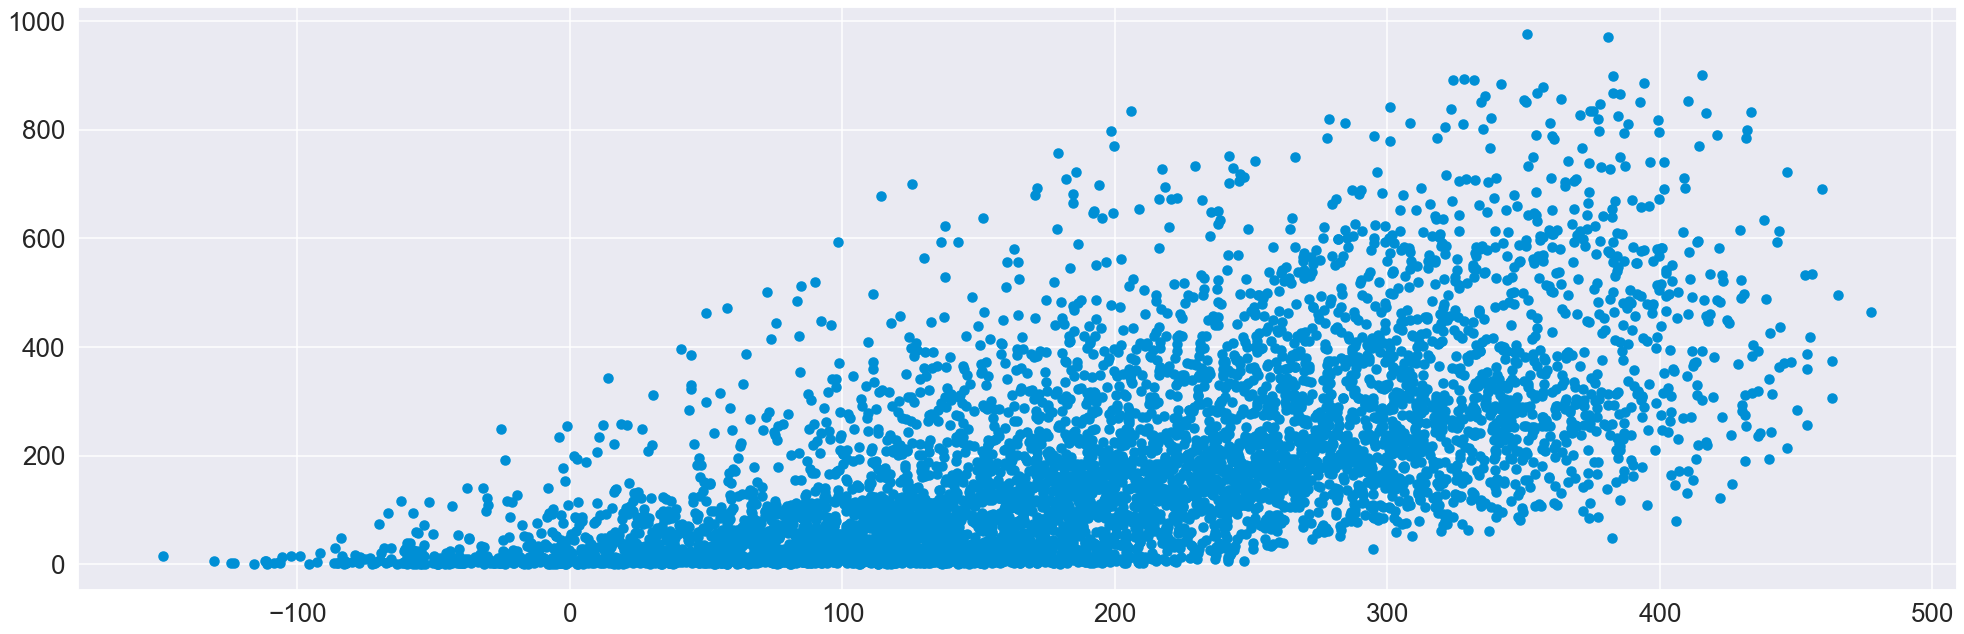

In [42]:
plt.scatter(pred_y,y_test)